In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Moving Windows

In [3]:
tsla=pd.read_csv("TSLA.csv")  

In [4]:
# Indexing the date to plot a good time-series on the graph
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla.index = tsla['Date']
tsla.head()

,Date,Open,Close,High,Low,Volume
Date,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100


In [5]:
#Bollinger Band Strategy
print("STRATEGY 2 - BOLLINGER BANDS ")
def bollinger_strat(df,window,no_of_std):
    rolling_mean = df['Close'].rolling(window).mean()
    rolling_std = df['Close'].rolling(window).std()
    
    df['Bollinger Mean'] = rolling_mean
    df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
    df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
    
    df['Short'] = None
    df['Long'] = None
    df['Position'] = None
    
    for row in range(len(df)):
    
        if (df['Close'].iloc[row] > df['Bollinger High'].iloc[row]) and (df['Close'].iloc[row-1] < df['Bollinger High'].iloc[row-1]):
            df['Position'].iloc[row] = -1
        
        if (df['Close'].iloc[row] < df['Bollinger Low'].iloc[row]) and (df['Close'].iloc[row-1] > df['Bollinger Low'].iloc[row-1]):
            df['Position'].iloc[row] = 1
            
    df['Position'].fillna(method='ffill',inplace=True)
    
    df['Market Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Strategy Return'] = df['Market Return'] * df['Position']
  
    #df['Strategy Return'].cumsum().plot()
    #df[['Bollinger Mean','Bollinger High','Bollinger Low','Close_pred']].plot()
    plt.figure(figsize=(20,10))
    plt.title('Bollinger Bands on Tesla Stocks')
    plt.xlabel('Days')
    plt.ylabel('Stock Prices')
    plt.plot(df['Bollinger Mean'], label= 'Bollinger Mean')
    plt.plot(df['Bollinger High'], label= 'Bollinger High')
    plt.plot(df['Bollinger Low'], label= 'Bollinger Low')
    plt.plot(df['Close'], label= 'Close')
    plt.legend()
    plt.show()
    return df

STRATEGY 2 - BOLLINGER BANDS 


/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


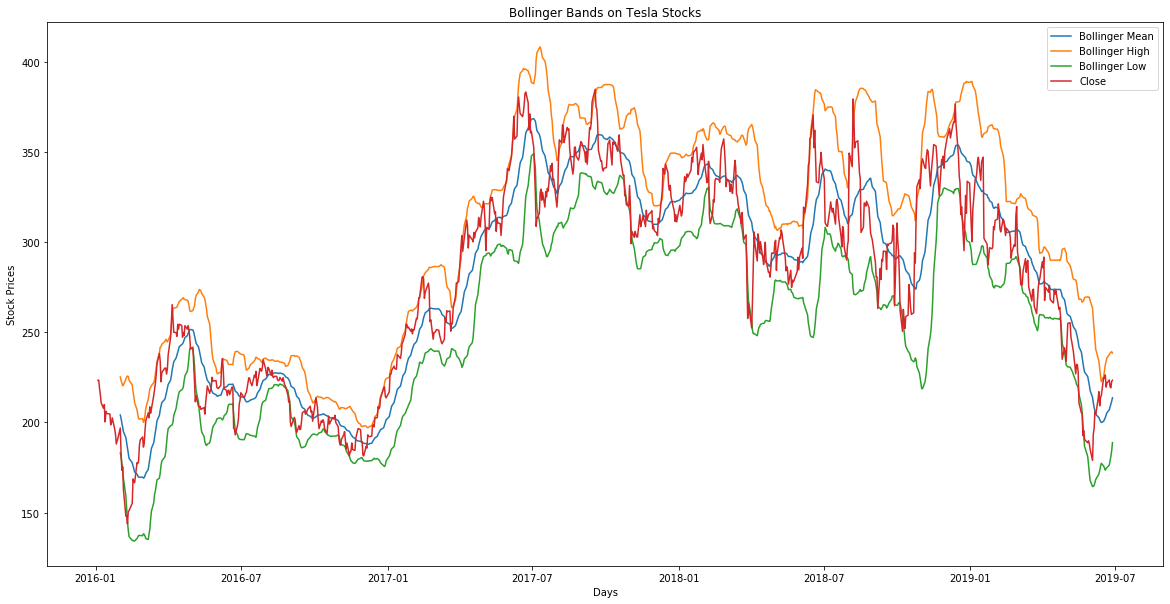

In [6]:
invest = bollinger_strat(tsla,20,2)

#H's intuition code

#buy 1, signal 0
action = []
signal = 0
for i in range(len(invest)):
    if invest['Close'][i] < invest['Bollinger Low'][i]:
        if signal == 0:
            invest['Action'][i]='Buy'
            invest['Signal'][i] = 1
            signal = 1
        else: 
            invest['Action'][i]='Bought In'
            invest['Signal'][i] = 2
    else:
        invest['Action'][i]='Not in'
        invest['Signal'][i] = 2
        
            
    if invest['Close'][i]> invest['Bollinger High'][i]:
        if signal == 1:
            invest['Action'][i]='Sell'
            invest['Signal'][i] = 0
            signal = 0
        else:
            invest['Action'][i]='Sold No action'
            invest['Signal'][i] = 3
    else:
        action.append('Sold No action')
        invest['Signal'][i] = 3
invest.head(500)

invest[(invest['Action']==0)|(invest['Action']==1)]

In [9]:
invest.head()

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return
Date,,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,NaN,NaN,NaN
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,NaN,0.000089,NaN
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,NaN,-0.019844,NaN
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,NaN,-0.015598,NaN
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,NaN,-0.021799,NaN


In [14]:
invest['Signal']=''
invest['Holding'] = ''
invest['Cash']=''
invest['Total_Value']=''
invest['Num_shares']=''
invest['Position']=''

In [15]:
#My Code based on H -- FINAL
#buy 1, signal 0
state = 0
for i in range(len(invest)):
    if invest['Close'][i] < invest['Bollinger Low'][i]:
        if state == 0:
            state = 1
            invest['Position'][i]='Buy'
            invest['Signal'][i] = state
            
        else: 
            invest['Signal'][i] = state
        
            
    elif invest['Close'][i]> invest['Bollinger High'][i]:
        if state == 1:
            invest['Position'][i]='Sell'
            state = 0
            invest['Signal'][i] = state
            
        else:
            invest['Signal'][i] = state
    else:
        invest['Signal'][i] = state

invest.head(50)

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rishikadawkar/anac

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Holding,Cash,Total_Value,Num_shares
Date,,,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,,NaN,NaN,0,,,,
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,,0.000089,NaN,0,,,,
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,,-0.019844,NaN,0,,,,
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,,-0.015598,NaN,0,,,,
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,,-0.021799,NaN,0,,,,
2016-01-11,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,NaN,NaN,NaN,None,None,,-0.015041,NaN,0,,,,
2016-01-12,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,NaN,NaN,NaN,None,None,,0.010148,NaN,0,,,,
2016-01-13,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,NaN,NaN,NaN,None,None,,-0.047099,NaN,0,,,,
2016-01-14,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,NaN,NaN,NaN,None,None,,0.028883,NaN,0,,,,


In [16]:
invest.head(70)

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Holding,Cash,Total_Value,Num_shares
Date,,,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,,NaN,NaN,0,,,,
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,,0.000089,NaN,0,,,,
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,,-0.019844,NaN,0,,,,
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,,-0.015598,NaN,0,,,,
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,,-0.021799,NaN,0,,,,
2016-01-11,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,NaN,NaN,NaN,None,None,,-0.015041,NaN,0,,,,
2016-01-12,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,NaN,NaN,NaN,None,None,,0.010148,NaN,0,,,,
2016-01-13,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,NaN,NaN,NaN,None,None,,-0.047099,NaN,0,,,,
2016-01-14,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,NaN,NaN,NaN,None,None,,0.028883,NaN,0,,,,


In [18]:
#My basic strategy to check the money made

import math 

Cash = float(10000)

for i in range(len(invest)):
        if invest['Position'][i]== 'Buy':
            N = math.floor(Cash/invest['Close'][i])        #number of shares that can be bought at 10,000
            Holding = invest['Close'][i] * N
            Cash = Cash - Holding
        if invest['Position'][i]== 'Sell':
            Holding = invest['Close'][i] * N
            Cash = Cash + Holding
        

In [19]:
Cash #since we haven't closed the position yet, this only shows leftover cash

155.58895300000222

In [20]:
#Final strategy

import math 

cash = float(10000) #N = math.floor(cash/invest['Close'][i]) -->will re-invest only 10,000$ each time and save profits
Cash = float(10000)
N = 0

for i in range(len(invest)):
    if invest['Position'][i]== 'Buy':
        N = math.floor(Cash/invest['Close'][i])        #number of shares that can be bought at 10,000
        invest['Holding'][i] = invest['Close'][i] * N
        Cash = Cash - invest['Holding'][i]
        invest['Cash'][i] = Cash
        invest['Total_Value'][i] = Cash + invest['Holding'][i] #leftover cash plus invested amount
        invest['Num_shares'][i] = N
        
    elif invest['Position'][i]== 'Sell':
        Holding = invest['Close'][i] * N
        Cash = Cash + Holding
        invest['Cash'][i] = Cash
        invest['Holding'][i] = 0
        invest['Total_Value'][i] = Cash
        N = 0
        invest['Num_shares'][i] = N
        
    else:
        if invest['Signal'][i] == 1:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]   = Cash #leftover cash from the last buy 
            invest['Total_Value'][i] = Cash + invest['Holding'][i]
            invest['Num_shares'][i] = N
            
        else:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]    = Cash
            invest['Total_Value'][i] = Cash
            invest['Num_shares'][i] = N
            

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packa

In [23]:
invest.tail(300)

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Holding,Cash,Total_Value,Num_shares
Date,,,,,,,,,,,,,,,,,,,
2018-04-20,2018-04-20,295.170013,290.239990,299.980011,289.750000,5627900,288.652998,320.631529,256.674466,None,None,,-0.033341,-0.033341,1,16833.9,244.51,17078.4,58
2018-04-23,2018-04-23,291.290009,283.369995,291.619995,282.329987,4893400,287.744497,319.209777,256.279217,None,None,,-0.023955,-0.023955,1,16435.5,244.51,16680,58
2018-04-24,2018-04-24,285.000000,283.459991,287.089996,278.459991,5685300,286.708497,317.246028,256.170966,None,None,,0.000318,0.000318,1,16440.7,244.51,16685.2,58
2018-04-25,2018-04-25,283.500000,280.690002,285.160004,277.250000,4013600,286.783997,317.250541,256.317454,None,None,,-0.009820,-0.009820,1,16280,244.51,16524.5,58
2018-04-26,2018-04-26,278.750000,285.480011,285.790009,276.500000,4356000,288.168998,315.434178,260.903818,None,None,,0.016921,0.016921,1,16557.8,244.51,16802.4,58
2018-04-27,2018-04-27,285.369995,294.079987,294.470001,283.829987,4364600,289.566497,314.869982,264.263012,None,None,,0.029680,0.029680,1,17056.6,244.51,17301.1,58
2018-04-30,2018-04-30,293.609985,293.899994,298.730011,292.500000,4228200,291.637497,309.984188,273.290806,None,None,,-0.000612,-0.000612,1,17046.2,244.51,17290.7,58
2018-05-01,2018-05-01,293.510010,299.920013,300.820007,293.220001,4625600,293.256998,308.009896,278.504099,None,None,,0.020276,0.020276,1,17395.4,244.51,17639.9,58
2018-05-02,2018-05-02,298.570007,301.149994,306.850006,297.779999,8970400,293.967497,308.807889,279.127106,None,None,,0.004093,0.004093,1,17466.7,244.51,17711.2,58


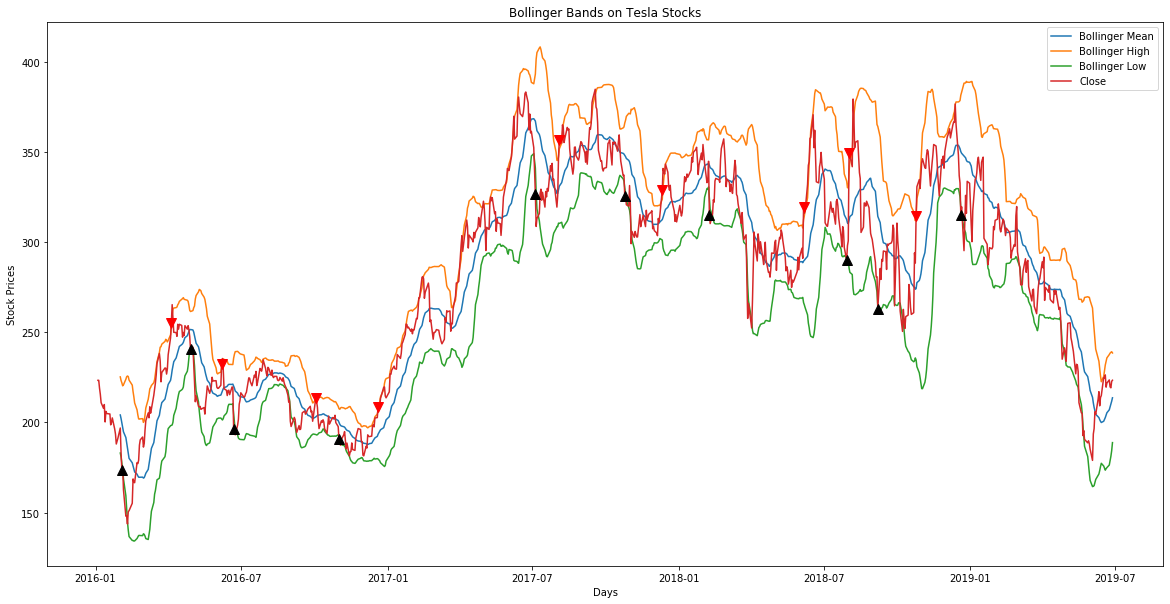

In [26]:
df = invest

plt.figure(figsize=(20,10))
plt.title('Bollinger Bands on Tesla Stocks')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.plot(df['Bollinger Mean'], label= 'Bollinger Mean')
plt.plot(df['Bollinger High'], label= 'Bollinger High')
plt.plot(df['Bollinger Low'], label= 'Bollinger Low')
plt.plot(df['Close'], label= 'Close')
    
# Plot the buy signals
plt.plot(df.loc[df.Position == 'Buy'].index, 
         df.Close[df.Position == 'Buy'],
         '^', markersize=10, color='k')


# Plot the sell signals
plt.plot(df.loc[df.Position == 'Sell'].index, 
         df.Close[df.Position == 'Sell'],
         'v', markersize=10, color='r')


# Plot the sell signals
#ax1.plot(signals.loc[signals.positions == -1.0].index, 
#         signals.short_mavg[signals.positions == -1.0],
 #        'v', markersize=10, color='r')    
plt.legend()
plt.show()

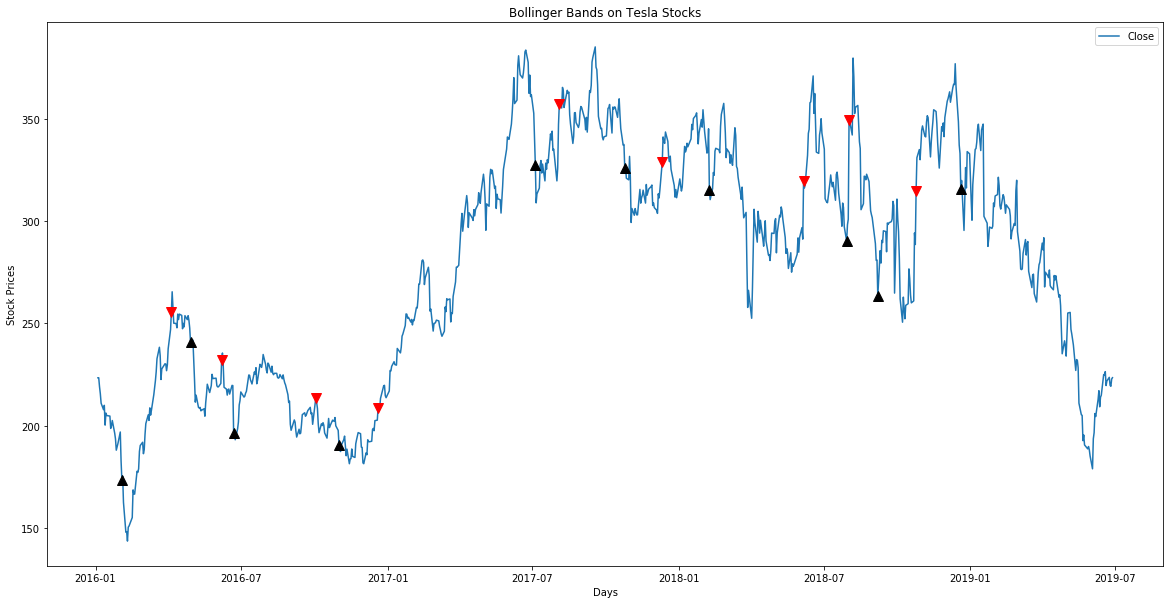

In [27]:
plt.figure(figsize=(20,10))
plt.title('Bollinger Bands on Tesla Stocks')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.plot(df['Close'], label= 'Close')
    
# Plot the buy signals
plt.plot(df.loc[df.Position == 'Buy'].index, 
         df.Close[df.Position == 'Buy'],
         '^', markersize=10, color='k')


# Plot the sell signals
plt.plot(df.loc[df.Position == 'Sell'].index, 
         df.Close[df.Position == 'Sell'],
         'v', markersize=10, color='r')


# Plot the sell signals
#ax1.plot(signals.loc[signals.positions == -1.0].index, 
#         signals.short_mavg[signals.positions == -1.0],
 #        'v', markersize=10, color='r')    
plt.legend()
plt.show()

In [28]:
invest['returns'] = invest['Total_Value'].pct_change()

invest.head(50)

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Holding,Cash,Total_Value,Num_shares,returns
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,,NaN,NaN,0,0,10000,10000,0,NaN
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,,0.000089,NaN,0,0,10000,10000,0,0.000000
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,,-0.019844,NaN,0,0,10000,10000,0,0.000000
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,,-0.015598,NaN,0,0,10000,10000,0,0.000000
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,,-0.021799,NaN,0,0,10000,10000,0,0.000000
2016-01-11,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,NaN,NaN,NaN,None,None,,-0.015041,NaN,0,0,10000,10000,0,0.000000
2016-01-12,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,NaN,NaN,NaN,None,None,,0.010148,NaN,0,0,10000,10000,0,0.000000
2016-01-13,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,NaN,NaN,NaN,None,None,,-0.047099,NaN,0,0,10000,10000,0,0.000000
2016-01-14,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,NaN,NaN,NaN,None,None,,0.028883,NaN,0,0,10000,10000,0,0.000000


In [30]:
# Isolate the returns of your strategy
returns = invest['returns']

# annualized 
#annualize the Sharpe ratio, since we calculated it from daily values. 
#There are 252 trading days in the year, so the simple way to annualize it is to multiply the Sharpe ratio by the square root of 252.
#Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.68923903935534


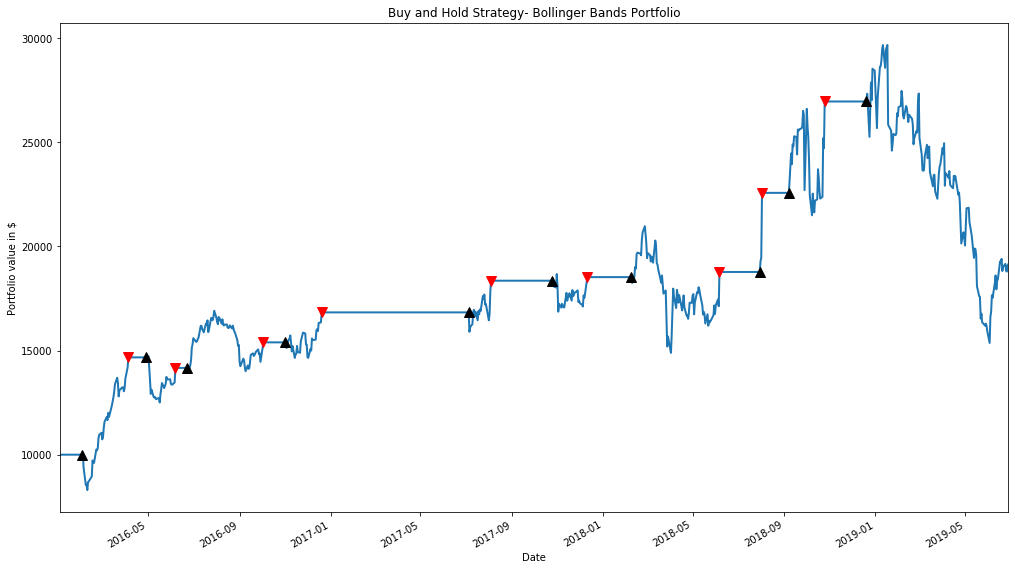

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

plt.title('Buy and Hold Strategy- Bollinger Bands Portfolio')
# Plot the equity curve in dollars
df['Total_Value'].plot(ax=ax1, lw=2.,figsize=(17,10))


# Plot the buy signals
plt.plot(df.loc[df.Position == 'Buy'].index, 
         df.Total_Value[df.Position == 'Buy'],
         '^', markersize=10, color='k')


# Plot the sell signals
plt.plot(df.loc[df.Position == 'Sell'].index, 
         df.Total_Value[df.Position == 'Sell'],
         'v', markersize=10, color='r')

# Show the plot
plt.show()